# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [260]:
#Import all the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [261]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data" , names=names)

pima_df_no_header = pd.read_csv("pima-indians-diabetes.data", header=None)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [262]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [263]:
pima_df[pima_df['plas'] == 0]

,preg,plas,pres,skin,test,mass,pedi,age,class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [264]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [265]:
pima_df.describe(include="all")
#Min value in Plasma, Pressure, Skin and other columns indicate 0's

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [266]:
#Getting 0's count column wise
pima_df.apply(lambda x: x==0, axis=0).sum()

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [267]:
plas_median = pima_df.median()
plas_median

preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [268]:
pima_df['plas'].replace(0, plas_median['plas'], inplace = True)
pima_df['pres'].replace(0, plas_median['pres'], inplace = True)
pima_df['skin'].replace(0, plas_median['skin'], inplace = True)
pima_df['test'].replace(0, plas_median['test'], inplace = True)
pima_df['mass'].replace(0, plas_median['mass'], inplace = True)
pima_df['pedi'].replace(0, plas_median['pedi'], inplace = True)
#pima_df.loc[ pima_df.col == 0, "plas" ] = plas_median['plas']

In [269]:
#To validate 0's in columns other than plasma
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [270]:
#75th row value of plama is replaced by median value
pima_df.head(76)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26,0
72,13,126,90,23,30.5,43.4,0.583,42,1
73,4,129,86,20,270.0,35.1,0.231,23,0
74,1,79,75,30,30.5,32.0,0.396,22,0


# Q5 Print the descriptive statistics of each & every column using describe() function

In [271]:
#Descriptive statistics after replacing 0's with column wise median value
pima_df.describe(include="all")

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

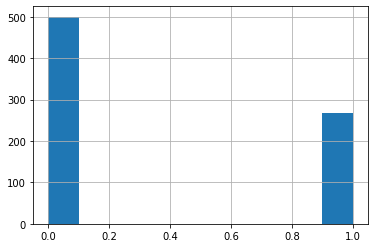

In [272]:
pima_df['class'].hist()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [273]:
#BP pressure - Mean-72, Median (50%)-72, Min = 24 and max = 122
pima_df['pres'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: pres, dtype: float64

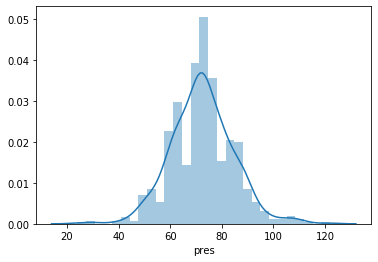

In [274]:
#looks perfect bell curve, unimodal
sns.distplot(pima_df['pres'])

In [275]:
#BP pressure - Mean-32, Median (50%)-32, Min = 18 and max = 67
pima_df['mass'].describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: mass, dtype: float64

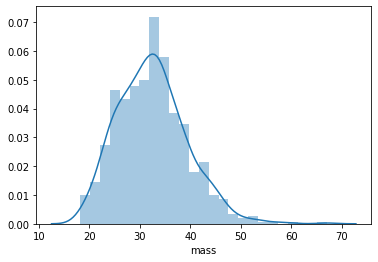

In [276]:
#Not looking like skewed curve, unimodal curve
sns.distplot(pima_df['mass'])

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [277]:
# +ve correlation b/w Skin to Mass - 0.55 - Comparitively there is correlation between Skin and Mass, correlation score - 0.55 which is highest compare to 
# other attributes
# +ve correlation b/w Age to Pregencies - 0.544 - There is positive correlation
# -ve correlation are observed b/w test to pregnencies, predigree to pregencies

#Most of the other attributes are looking scattered
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


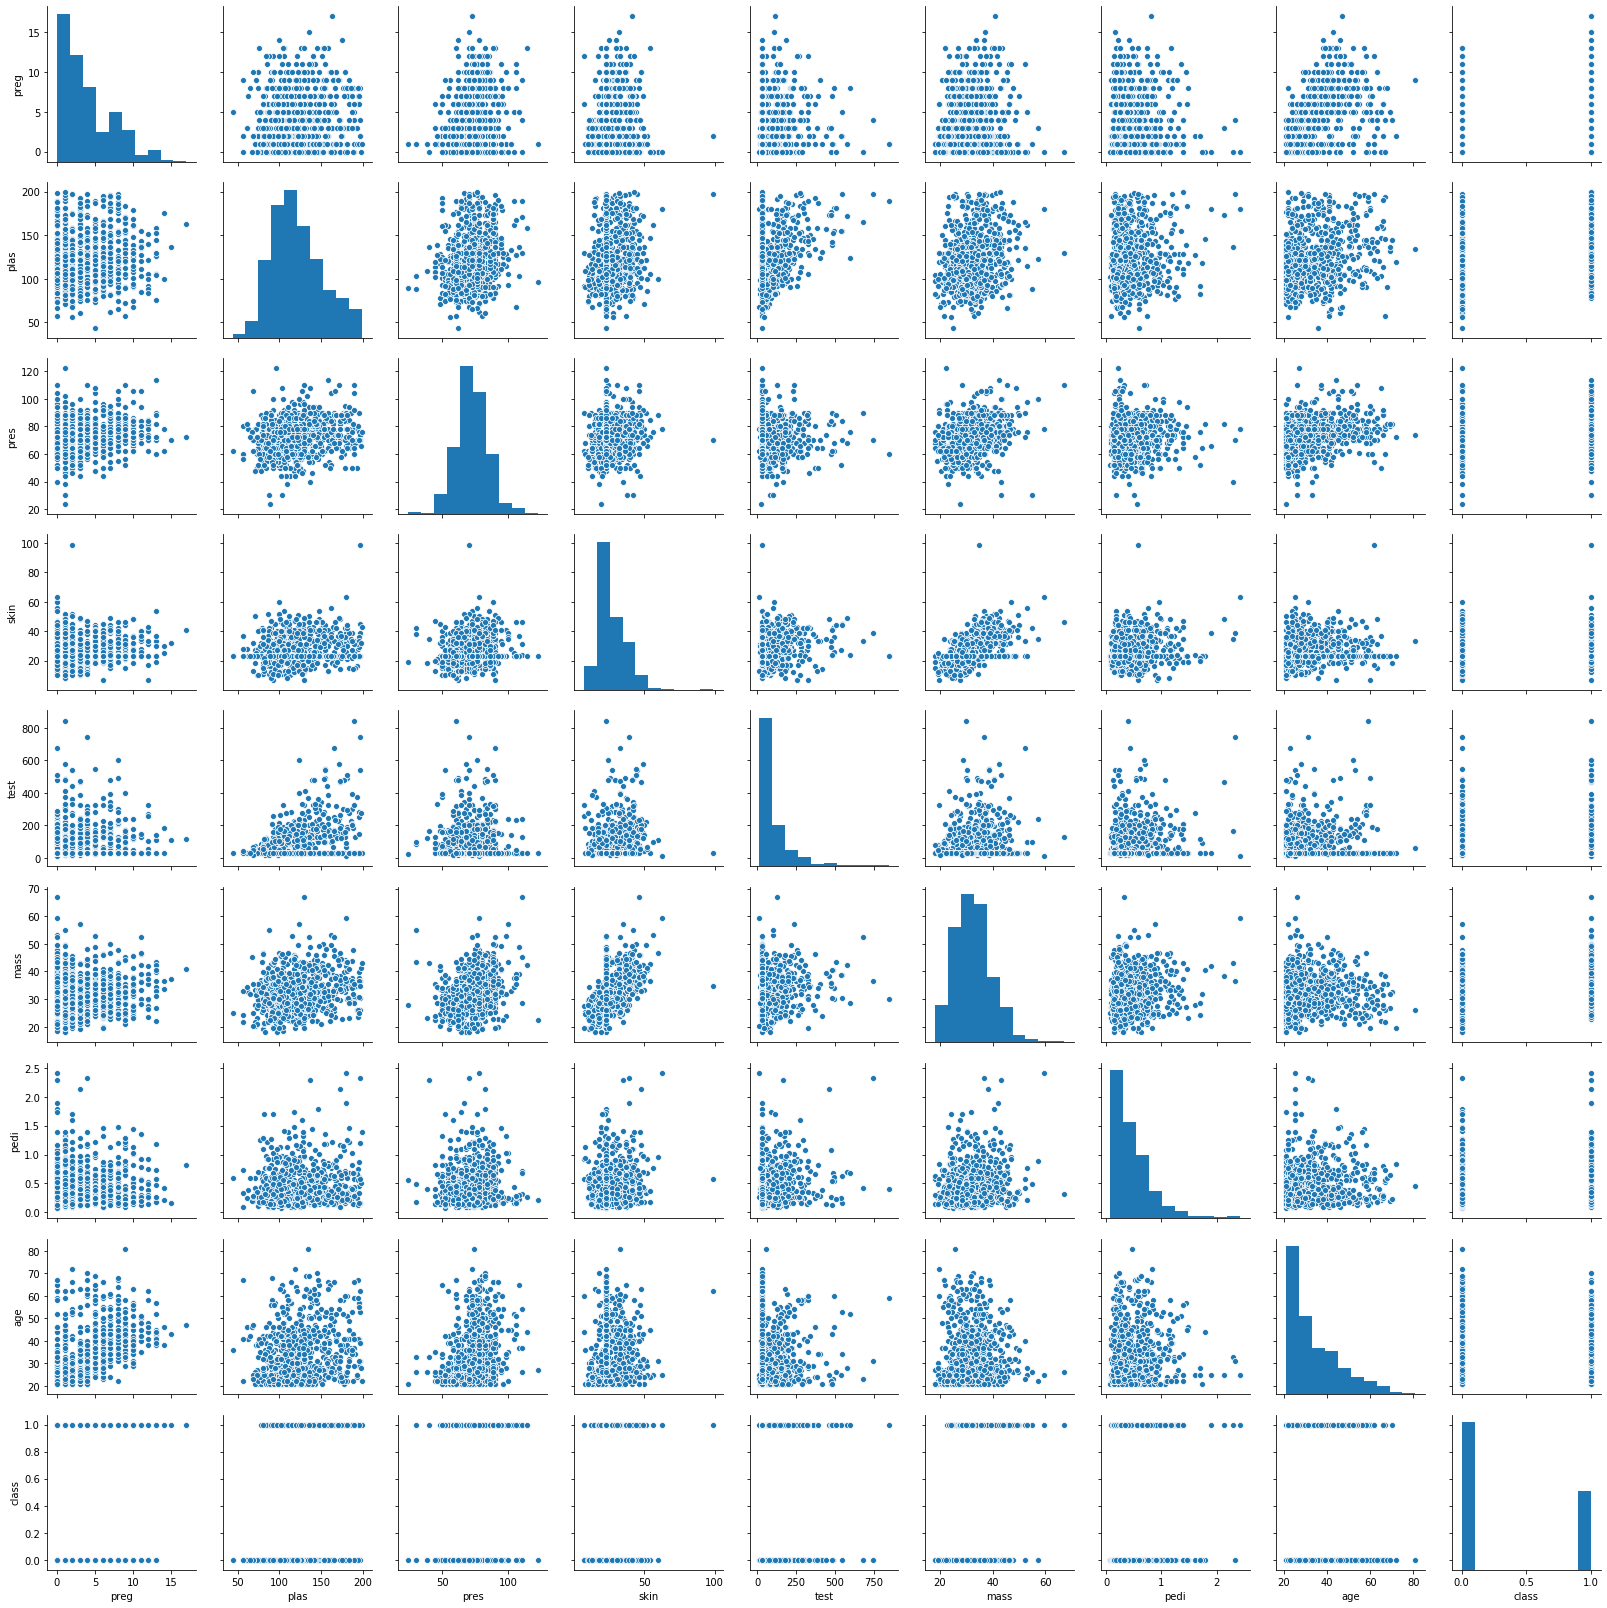

In [278]:
sns.pairplot(pima_df)

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [279]:
# Putting class variable to X
X = pima_df.drop('class',axis=1)

# Putting response variable to y
y = pima_df['class']

In [280]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, pima_df_test, predict_train, predict_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 7)
pima_df_train.head()

,preg,plas,pres,skin,test,mass,pedi,age
590,11,111,84,40,30.5,46.8,0.925,45
692,2,121,70,32,95.0,39.1,0.886,23
492,4,99,68,38,30.5,32.8,0.145,33
205,5,111,72,28,30.5,23.9,0.407,27
709,2,93,64,32,160.0,38.0,0.674,23


In [281]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [282]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [283]:
y_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print("Accuracy without max depth specified - ",model_score)
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy without max depth specified -  0.6666666666666666
[[106  41]
 [ 36  48]]


In [284]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=8)
dt_model1.fit(X_train, y_train)
y_predict1 = dt_model1.predict(X_test)
model_score1 = dt_model1.score(X_test, y_test)
print("Accuracy without max depth=5 - ", model_score1)
print(metrics.confusion_matrix(y_test, y_predict1))

Accuracy without max depth=5 -  0.696969696969697
[[114  33]
 [ 37  47]]


In [285]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
dt_model1.fit(X_train, y_train)
y_predict1 = dt_model1.predict(X_test)
model_score1 = dt_model1.score(X_test, y_test)
print("Accuracy without max depth=5 - ", model_score1)
print(metrics.confusion_matrix(y_test, y_predict1))

Accuracy without max depth=5 -  0.7316017316017316
[[127  20]
 [ 42  42]]


In [286]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
dt_model1.fit(X_train, y_train)
y_predict1 = dt_model1.predict(X_test)
model_score1 = dt_model1.score(X_test, y_test)
print("Accuracy without max depth=5 - ", model_score1)
print(metrics.confusion_matrix(y_test, y_predict1))

Accuracy without max depth=5 -  0.7359307359307359
[[123  24]
 [ 37  47]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [287]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 41)

In [288]:
rf_model.fit(X_train, y_train)
y_predict_rf = rf_model.predict(X_test)
rf_model_score = rf_model.score(X_test, y_test)
print("Accuracy without max depth=5 - ", rf_model_score)
print(metrics.confusion_matrix(y_test, y_predict_rf))

Accuracy without max depth=5 -  0.7186147186147186
[[122  25]
 [ 40  44]]


In [289]:
rf_class_report=metrics.classification_report(y_test,y_predict_rf)
print(rf_class_report)

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79       147
         1.0       0.64      0.52      0.58        84

    accuracy                           0.72       231
   macro avg       0.70      0.68      0.68       231
weighted avg       0.71      0.72      0.71       231



# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [290]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(base_estimator=dt_model1,n_estimators= 50)

In [291]:
ab_model.fit(X_train, y_train)
y_predict_ab = ab_model.predict(X_test)
ab_model_score = ab_model.score(X_test, y_test)
print("Accuracy without max depth=5 - ", ab_model_score)
print(metrics.confusion_matrix(y_test, y_predict_ab))

Accuracy without max depth=5 -  0.7402597402597403
[[112  35]
 [ 25  59]]


In [292]:
ab_class_report=metrics.classification_report(y_test,y_predict_ab)
print(ab_class_report)

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       147
         1.0       0.63      0.70      0.66        84

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.74      0.74       231



# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [293]:
from sklearn.ensemble import BaggingClassifier
bg_model = BaggingClassifier(base_estimator=dt_model1,n_estimators=50,oob_score=True)

In [294]:
bg_model.fit(X_train, y_train)
y_predict_bg = bg_model.predict(X_test)
bg_model_score = bg_model.score(X_test, y_test)
print("Accuracy without max depth=5 - ", bg_model_score)
print(metrics.confusion_matrix(y_test, y_predict_bg))

Accuracy without max depth=5 -  0.7532467532467533
[[125  22]
 [ 35  49]]


In [295]:
bg_class_report=metrics.classification_report(y_test,y_predict_bg)
print(bg_class_report)

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       147
         1.0       0.69      0.58      0.63        84

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [296]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 50)

In [301]:
gb_model.fit(X_train, y_train)
y_predict_gb = gb_model.predict(X_test)
gb_model_score = gb_model.score(X_test, y_test)
print("Accuracy  - ", gb_model_score)
print(metrics.confusion_matrix(y_test, y_predict_gb))

Accuracy  -  0.7445887445887446
[[123  24]
 [ 35  49]]


In [298]:
class_report=metrics.classification_report(y_test,y_predict_gb)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       147
         1.0       0.67      0.58      0.62        84

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [310]:
from sklearn.ensemble import VotingClassifier
vt_model = VotingClassifier(estimators=[
    ('GradientBoost', gb_model), ('Bagging', bg_model), ('AdaBoost', ab_model)], voting='hard')

In [311]:
vt_model.fit(X_train, y_train)
y_predict_vt = vt_model.predict(X_test)
vt_model_score = vt_model.score(X_test, y_test)
print("Accuracy  - ", vt_model_score)
print(metrics.confusion_matrix(y_test, y_predict_vt))

Accuracy  -  0.7575757575757576
[[125  22]
 [ 34  50]]
